In [78]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap 
import automap_base
from sqlalchemy.orm 
import Session
from sqlalchemy 
import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).distinct().\
    order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

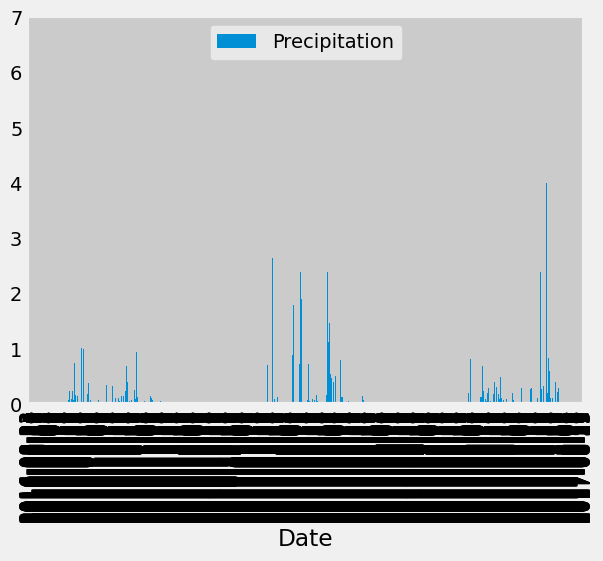

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_years_date = dt.date(2017,8,23)-dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
last_years_precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_years_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
from pandas import DataFrame
df = pd.DataFrame(last_years_precipitation, columns= ["Date","Precipitation"])
# Sort the dataframe by date
df = df.sort_values("Date")
df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="bar",x="Date",y="Precipitation")
plt.show()

In [130]:
total_precipitation = [measurement.date.all(), measurement.prcp.all()]
total_precipitation

AttributeError: Neither 'InstrumentedAttribute' object nor 'Comparator' object associated with measurement.date has an attribute 'all'

In [105]:
# Use Pandas to calculate the summary statistics for the precipitation data
import scipy.stats as st
precipitation_df = pd.read_csv('./Resources/hawaii_measurements.csv')
precipitation = precipitation_df["prcp"]
precipitation_df.shape

mean_numpy = np.mean(precipitation)
mean_numpy

median_numpy = np.median(precipitation)
median_numpy

mode= st.mode(precipitation)
mode

stdev_numpy = np.std(precipitation)
stdev_numpy

0.46873278511244865

# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [135]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [134]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).all()


[('USC00519397', 53.0, 87.0, 73.09795396419437)]

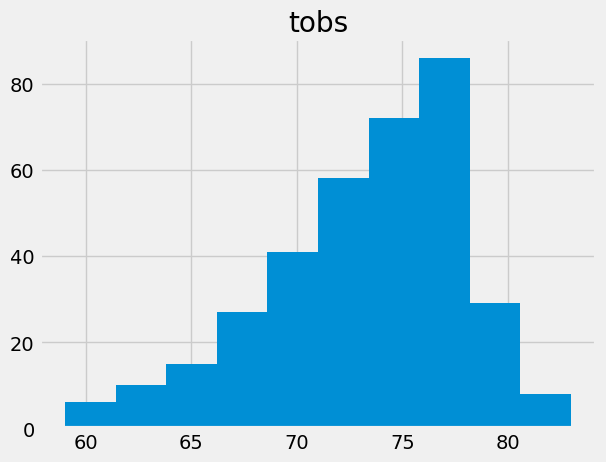

In [144]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Yearly_temp=session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= last_years_date).all()
df = pd.DataFrame(Yearly_temp)
df.hist()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()